In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [4]:
def synthetic_data(w,b,num_example):
    """生成 y = Xw + b + 噪音"""
    X = torch.normal(0, 1, (num_example,len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) #随机噪音
    return X,y.reshape((-1,1))
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b , 1000)

In [8]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-0.4077, -1.0404]) 
label: tensor([6.9466])


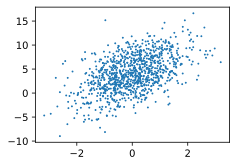

In [19]:
d2l.set_figsize()
d2l.plt.scatter(features[:,0].detach().numpy(),
               labels.detach().numpy(),1);

定义一个data_iter函数，该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量

In [16]:
def data_iter(batch_size, feature, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本随机读取 没有特定顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10
for x,y in data_iter(batch_size, features, labels):
    print(x,'\n',y)
    break
        

tensor([[-0.7728, -0.1020],
        [-0.5521, -0.3163],
        [ 1.2093, -1.2905],
        [-0.6921, -0.8674],
        [ 0.2811, -0.1431],
        [ 0.4599, -0.2821],
        [-0.0434,  1.6288],
        [-0.9644,  0.9891],
        [ 0.8040,  1.0971],
        [ 1.6094, -0.4135]]) 
 tensor([[ 3.0029],
        [ 4.1777],
        [11.0198],
        [ 5.7645],
        [ 5.2461],
        [ 6.0938],
        [-1.4211],
        [-1.0983],
        [ 2.0774],
        [ 8.8191]])


定义初始化模型参数

In [41]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

定义模型

In [23]:
def linreg(X, w, b):
    '''线性回归模型'''
    return torch.matmul(X, w) + b

定义损失函数

In [24]:
def squared_loss(y_hat,y):
    '''均方误差'''
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

定义优化算法

In [25]:
def sgd(params, lr, batch_size):
    '''小批量随机梯度下降'''
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

训练过程

In [44]:
lr = 0.01    #学习率
num_epochs = 3  # 整个数据扫三遍 
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # x y 的小批量损失
        # 因为l 的形状是(batch_size,1) 而不是一个标量。 l 中所有元素求和算梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size) #使用参数的梯度更新
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1},loss{float(train_l.mean()):f}')


epoch1,loss0.000083
epoch2,loss0.000057
epoch3,loss0.000053


比较真实参数和通过训练学到的参数来评估训练的成功程度

In [31]:
print(f'w的误差:{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的误差:tensor([-0.0002, -0.0004], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)
